In [89]:
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [90]:
question_1_csv = Path("../Resources/energy_dataset_.csv")
df = pd.read_csv(question_1_csv)
df.head()

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
0,4,93.423205,103853.2206,248708.4892,2953.248771,89.887562,4,4.732248e+08,1,9.207772e+06,6663.816572,81.742461,1366
1,4,590.468942,190223.0649,166104.1642,5305.174042,84.403343,4,1.670697e+08,2,1.685101e+06,30656.049820,78.139042,1743
2,1,625.951142,266023.4824,424114.6308,2620.192622,60.498249,2,8.463610e+07,2,5.111813e+06,1749.613759,8.461296,363
3,1,779.998728,487039.5296,308337.7316,1925.250307,86.897861,3,3.967690e+08,2,4.805902e+06,43233.237820,8.402441,2821
4,3,242.106837,482815.0856,360437.7705,3948.945383,70.949351,2,3.574413e+07,1,1.668601e+07,14858.662760,28.822867,2583


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type_of_Renewable_Energy       15000 non-null  int64  
 1   Installed_Capacity_MW          15000 non-null  float64
 2   Energy_Production_MWh          15000 non-null  float64
 3   Energy_Consumption_MWh         15000 non-null  float64
 4   Energy_Storage_Capacity_MWh    15000 non-null  float64
 5   Storage_Efficiency_Percentage  15000 non-null  float64
 6   Grid_Integration_Level         15000 non-null  int64  
 7   Initial_Investment_USD         15000 non-null  float64
 8   Funding_Sources                15000 non-null  int64  
 9   Financial_Incentives_USD       15000 non-null  float64
 10  GHG_Emission_Reduction_tCO2e   15000 non-null  float64
 11  Air_Pollution_Reduction_Index  15000 non-null  float64
 12  Jobs_Created                   15000 non-null 

In [92]:
energy = {1: "Solar", 2: 'Wind', 3: "Hydroelectric", 4: "Geothermal", 5: "Biomass", 6: "Tidal", 7: "Wave"}

df["renewable_energy_source"] =  df.Type_of_Renewable_Energy.map(energy)

df.head()

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created,renewable_energy_source
0,4,93.423205,103853.2206,248708.4892,2953.248771,89.887562,4,4.732248e+08,1,9.207772e+06,6663.816572,81.742461,1366,Geothermal
1,4,590.468942,190223.0649,166104.1642,5305.174042,84.403343,4,1.670697e+08,2,1.685101e+06,30656.049820,78.139042,1743,Geothermal
2,1,625.951142,266023.4824,424114.6308,2620.192622,60.498249,2,8.463610e+07,2,5.111813e+06,1749.613759,8.461296,363,Solar
3,1,779.998728,487039.5296,308337.7316,1925.250307,86.897861,3,3.967690e+08,2,4.805902e+06,43233.237820,8.402441,2821,Solar
4,3,242.106837,482815.0856,360437.7705,3948.945383,70.949351,2,3.574413e+07,1,1.668601e+07,14858.662760,28.822867,2583,Hydroelectric


In [93]:
df_value = df.renewable_energy_source.value_counts().reset_index()
df_value

,renewable_energy_source,count
0,Wind,2202
1,Solar,2169
2,Hydroelectric,2157
3,Biomass,2150
4,Tidal,2124
5,Geothermal,2105
6,Wave,2093


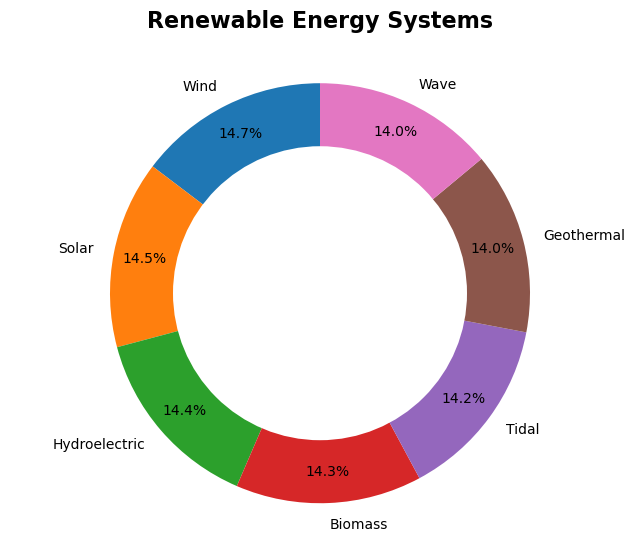

In [94]:
data = df_value["count"]
labels = df_value["renewable_energy_source"]

# Step 2: Make the canvas
plt.figure(figsize=(8, 6))

# Step 3: Make the plot
plt.pie(data, labels=labels,
        autopct="%1.1f%%", shadow=False, startangle=90, pctdistance=0.85)

# Step 3.5: Add in the donut hole
# draw circle
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(center_circle)

# Step 4: Customizations
plt.title(f"Renewable Energy Systems\n", fontweight="bold", fontsize=16)
plt.axis("equal")

# Step 5: Save/Show
plt.show()

In [95]:
df.columns

Index(['Type_of_Renewable_Energy', 'Installed_Capacity_MW',
       'Energy_Production_MWh', 'Energy_Consumption_MWh',
       'Energy_Storage_Capacity_MWh', 'Storage_Efficiency_Percentage',
       'Grid_Integration_Level', 'Initial_Investment_USD', 'Funding_Sources',
       'Financial_Incentives_USD', 'GHG_Emission_Reduction_tCO2e',
       'Air_Pollution_Reduction_Index', 'Jobs_Created',
       'renewable_energy_source'],
      dtype='object')

In [96]:
bar_df = df.groupby('renewable_energy_source')[['Energy_Production_MWh', 'Energy_Consumption_MWh']].mean().reset_index()
bar_df["Energy_Surplus_MWh"] = bar_df.Energy_Production_MWh - bar_df.Energy_Consumption_MWh

bar_df = bar_df.sort_values(by = "Energy_Surplus_MWh", ascending = True)

bar_df

,renewable_energy_source,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Surplus_MWh
6,Wind,250384.797558,228664.108937,21720.688621
5,Wave,252571.041821,228507.626678,24063.415143
3,Solar,252813.675988,228301.990566,24511.685422
4,Tidal,254210.857269,227249.932949,26960.924321
1,Geothermal,252893.832742,225350.324729,27543.508013
2,Hydroelectric,251070.361751,221711.577320,29358.784430
0,Biomass,252599.445246,222085.029309,30514.415938


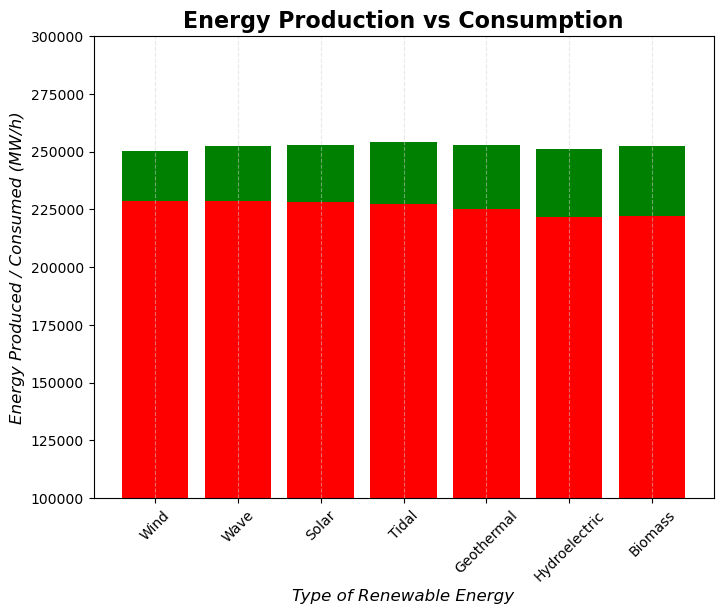

In [97]:
y = bar_df["Energy_Production_MWh"]
y2 = bar_df['Energy_Consumption_MWh']
x = bar_df["renewable_energy_source"]


# Step 2: Create the Canvas
plt.figure(figsize=(8,6))

# Step 3: Create the skeleton plot
plt.bar(x, y, color="green", label='Energy Production')
plt.bar(x, y2, color= "red", label='Energy Consumption')

# Step 4: Customization
plt.xlabel("Type of Renewable Energy", fontsize=12, fontstyle="italic")
plt.ylabel("Energy Produced / Consumed (MW/h)", fontsize=12, fontstyle="italic")
plt.title("Energy Production vs Consumption", fontsize=16, fontweight="bold")
plt.ylim(100000, 300000)

plt.grid(axis="x", color="lightgrey", linestyle="--", alpha=0.5)
plt.xticks(rotation=45)

# Step 5: Show/Save
plt.show()

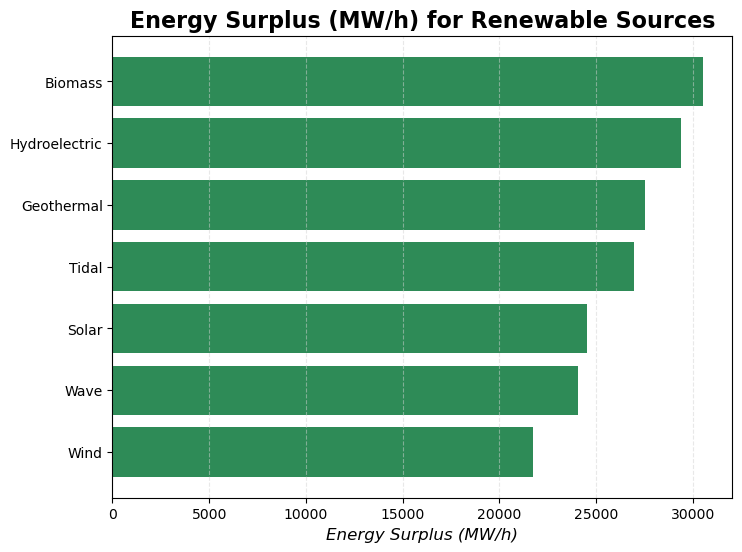

In [98]:
y = bar_df["Energy_Surplus_MWh"]
x = bar_df["renewable_energy_source"]


# Step 2: Create the Canvas
plt.figure(figsize=(8,6))

# Step 3: Create the skeleton plot
plt.barh(x, y, color="seagreen")

# Step 4: Customization
plt.xlabel("Energy Surplus (MW/h)", fontsize=12, fontstyle="italic")
plt.title("Type of Renewable Energy", fontsize=16, fontweight="bold")
plt.title("Energy Surplus (MW/h) for Renewable Sources", fontsize=16, fontweight="bold")

plt.grid(axis="x", color="lightgrey", linestyle="--", alpha=0.5)

# Step 5: Show/Save
plt.show()

In [99]:
grid_integration = {1: 'Fully Integrated', 2: 'Partially Integrated', 3: 'Minimal Integration', 4: 'Isolated Microgrid'}

df["grid_integration_type"] =  df.Grid_Integration_Level.map(grid_integration)

df.head()

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created,renewable_energy_source,grid_integration_type
0,4,93.423205,103853.2206,248708.4892,2953.248771,89.887562,4,4.732248e+08,1,9.207772e+06,6663.816572,81.742461,1366,Geothermal,Isolated Microgrid
1,4,590.468942,190223.0649,166104.1642,5305.174042,84.403343,4,1.670697e+08,2,1.685101e+06,30656.049820,78.139042,1743,Geothermal,Isolated Microgrid
2,1,625.951142,266023.4824,424114.6308,2620.192622,60.498249,2,8.463610e+07,2,5.111813e+06,1749.613759,8.461296,363,Solar,Partially Integrated
3,1,779.998728,487039.5296,308337.7316,1925.250307,86.897861,3,3.967690e+08,2,4.805902e+06,43233.237820,8.402441,2821,Solar,Minimal Integration
4,3,242.106837,482815.0856,360437.7705,3948.945383,70.949351,2,3.574413e+07,1,1.668601e+07,14858.662760,28.822867,2583,Hydroelectric,Partially Integrated


In [100]:
funding_sources = {1: 'Government', 2: 'Private', 3: 'Public-Private Partnership'}

df["funding_label"] =  df.Funding_Sources.map(funding_sources)

df.head()

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created,renewable_energy_source,grid_integration_type,funding_label
0,4,93.423205,103853.2206,248708.4892,2953.248771,89.887562,4,4.732248e+08,1,9.207772e+06,6663.816572,81.742461,1366,Geothermal,Isolated Microgrid,Government
1,4,590.468942,190223.0649,166104.1642,5305.174042,84.403343,4,1.670697e+08,2,1.685101e+06,30656.049820,78.139042,1743,Geothermal,Isolated Microgrid,Private
2,1,625.951142,266023.4824,424114.6308,2620.192622,60.498249,2,8.463610e+07,2,5.111813e+06,1749.613759,8.461296,363,Solar,Partially Integrated,Private
3,1,779.998728,487039.5296,308337.7316,1925.250307,86.897861,3,3.967690e+08,2,4.805902e+06,43233.237820,8.402441,2821,Solar,Minimal Integration,Private
4,3,242.106837,482815.0856,360437.7705,3948.945383,70.949351,2,3.574413e+07,1,1.668601e+07,14858.662760,28.822867,2583,Hydroelectric,Partially Integrated,Government


In [101]:
bar_df

,renewable_energy_source,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Surplus_MWh
6,Wind,250384.797558,228664.108937,21720.688621
5,Wave,252571.041821,228507.626678,24063.415143
3,Solar,252813.675988,228301.990566,24511.685422
4,Tidal,254210.857269,227249.932949,26960.924321
1,Geothermal,252893.832742,225350.324729,27543.508013
2,Hydroelectric,251070.361751,221711.577320,29358.784430
0,Biomass,252599.445246,222085.029309,30514.415938


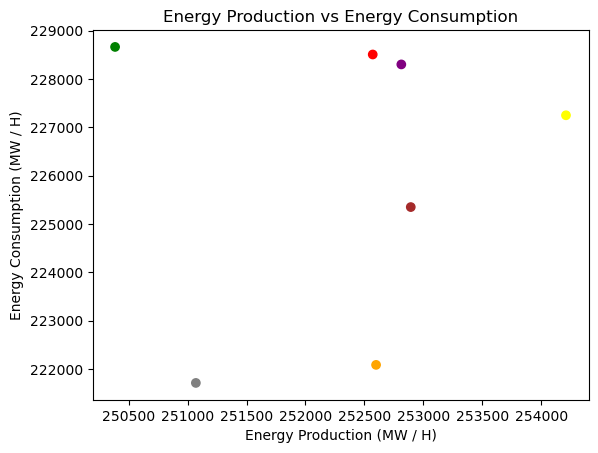

In [102]:
x_values = bar_df['Energy_Production_MWh']
y_values = bar_df['Energy_Consumption_MWh']
s = bar_df.renewable_energy_source


# sizes = question_1_df['Storage_Efficiency_Percentage']
color_map ={
    'Wind':'Green',
    'Wave': 'Red',
    'Solar': 'Purple',
    'Tidal': 'Yellow',
    'Geothermal': 'Brown',
    'Hydroelectric': 'Gray',
    'Biomass': "Orange"
}

colors = s.map(color_map)
# color = over_98_question['Type_of_Renewable_Energy'].map(color_map)

plt.scatter(x_values,y_values,c=colors)
# ,c=color
# , s=sizes
plt.xlabel('Energy Production (MW / H)')
plt.ylabel('Energy Consumption (MW / H)')
plt.title("Energy Production vs Energy Consumption")
plt.show()

In [103]:
# "1": 'Green', "2": 'Spanish orange', "3": 'Indigo Dye', "4": 'Carmine', "5": 'Dark spring green', "6": 'Lavender (floral)', "7": "Seal brown"

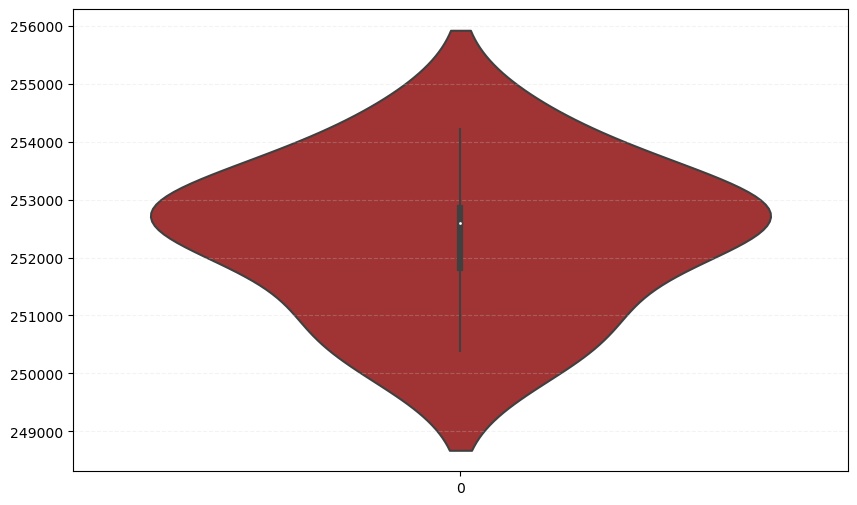

In [104]:
# Step 1: get the data
x = bar_df.Energy_Production_MWh

# create the plot
plt.figure(figsize=(10,6))
sns.violinplot(data=x, color="firebrick")

# customizations
# plt.xlabel("Population", fontstyle="italic", fontsize=12)
# plt.ylabel("Count", fontstyle="italic", fontsize=12)
# plt.title("Violinplot of Population", fontsize=16, fontweight="bold")
# plt.ylim(-1000, 17000)

plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.25)

# show
plt.show()

In [105]:
# Create a Matplotlib figure and axis:

# fig, ax = plt.subplots()
# # Use the violinplot function to create each violin plot within the same figure:

# #sns.violinplot(data=et_1_df['Energy_Production_MWh'], ax=ax)
# sns.violinplot(data=data2, ax=ax)

# plt.show()

Text(0.5, 1.0, 'Violinplot of Solar Energy')

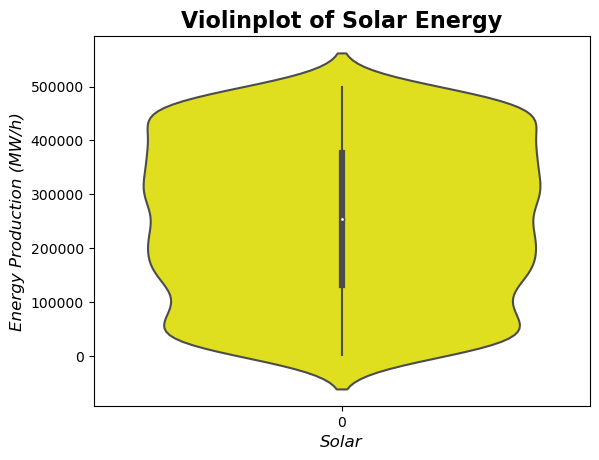

In [106]:
mask_et_1 = df['Type_of_Renewable_Energy'] == 1

et_1_df=df.loc[mask_et_1].reset_index(drop=True)

et_1_df.head()

# Create a Matplotlib figure and axis:
# ax = plt.subplots()

# fig, ax = plt.subplots()
# Use the violinplot function to create each violin plot within the same figure:

sns.violinplot(data=et_1_df['Energy_Production_MWh'], color="Yellow")
plt.xlabel("Solar", fontstyle="italic", fontsize=12)
plt.ylabel("Energy Production (MW/h)", fontstyle="italic", fontsize=12)
plt.title("Violinplot of Solar Energy", fontsize=16, fontweight="bold")


Text(0.5, 1.0, 'Violinplot of Wind Energy')

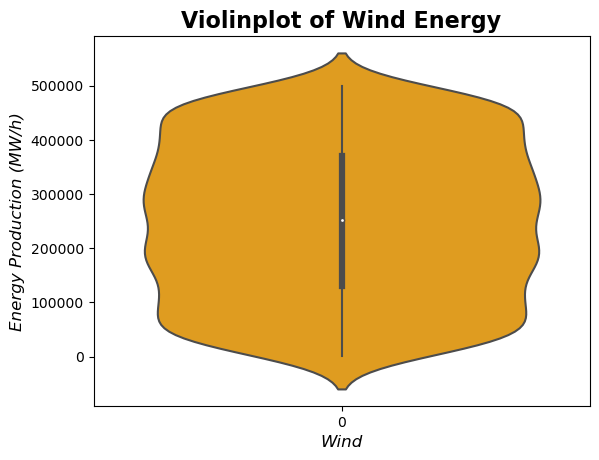

In [107]:
mask_et_2 = df['Type_of_Renewable_Energy'] == 2

et_2_df=df.loc[mask_et_2].reset_index(drop=True)

et_2_df.head()

# Create a Matplotlib figure and axis:

# Use the violinplot function to create each violin plot within the same figure:

sns.violinplot(data=et_2_df['Energy_Production_MWh'], color="Orange")
plt.xlabel("Wind", fontstyle="italic", fontsize=12)
plt.ylabel("Energy Production (MW/h)", fontstyle="italic", fontsize=12)
plt.title("Violinplot of Wind Energy", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Violinplot of Hydroelectric Electric')

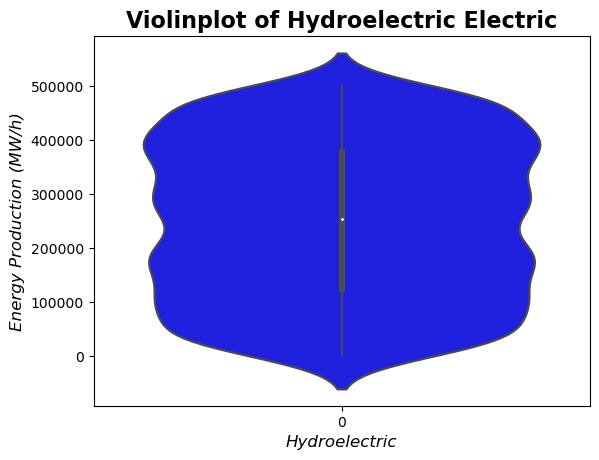

In [108]:
mask_et_3 = df['Type_of_Renewable_Energy'] == 3

et_3_df=df.loc[mask_et_3].reset_index(drop=True)

et_3_df.head()

# Create a Matplotlib figure and axis:

# Use the violinplot function to create each violin plot within the same figure:

sns.violinplot(data=et_3_df['Energy_Production_MWh'], color="Blue")
plt.xlabel("Hydroelectric", fontstyle="italic", fontsize=12)
plt.ylabel("Energy Production (MW/h)", fontstyle="italic", fontsize=12)
plt.title("Violinplot of Hydroelectric Electric", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Violinplot of Geothermal Energy')

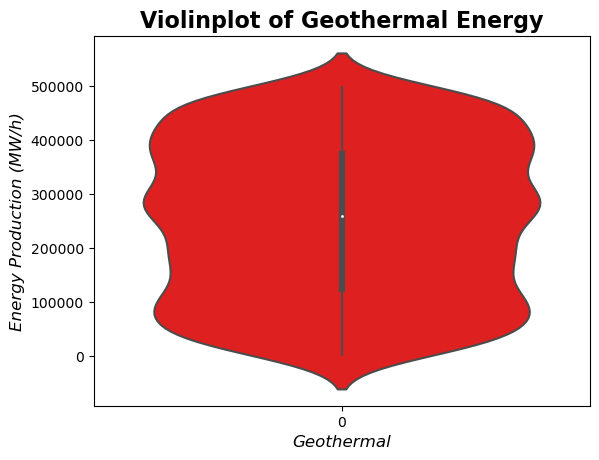

In [109]:
mask_et_4 = df['Type_of_Renewable_Energy'] == 4

et_4_df=df.loc[mask_et_4].reset_index(drop=True)

et_4_df.head()

# Create a Matplotlib figure and axis:

# Use the violinplot function to create each violin plot within the same figure:

sns.violinplot(data=et_4_df['Energy_Production_MWh'], color="Red")
plt.xlabel("Geothermal", fontstyle="italic", fontsize=12)
plt.ylabel("Energy Production (MW/h)", fontstyle="italic", fontsize=12)
plt.title("Violinplot of Geothermal Energy", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Violinplot of Biomass Energy')

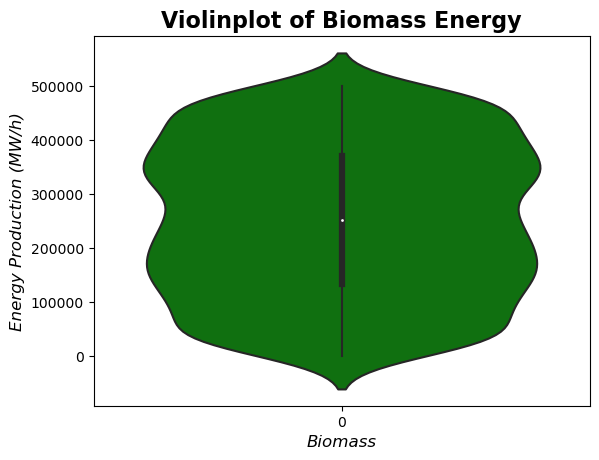

In [110]:
mask_et_5 = df['Type_of_Renewable_Energy'] == 5

et_5_df=df.loc[mask_et_5].reset_index(drop=True)

et_5_df.head()

# Create a Matplotlib figure and axis:

# Use the violinplot function to create each violin plot within the same figure:

sns.violinplot(data=et_5_df['Energy_Production_MWh'], color="Green")
plt.xlabel("Biomass", fontstyle="italic", fontsize=12)
plt.ylabel("Energy Production (MW/h)", fontstyle="italic", fontsize=12)
plt.title("Violinplot of Biomass Energy", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Violinplot of Tidal Energy')

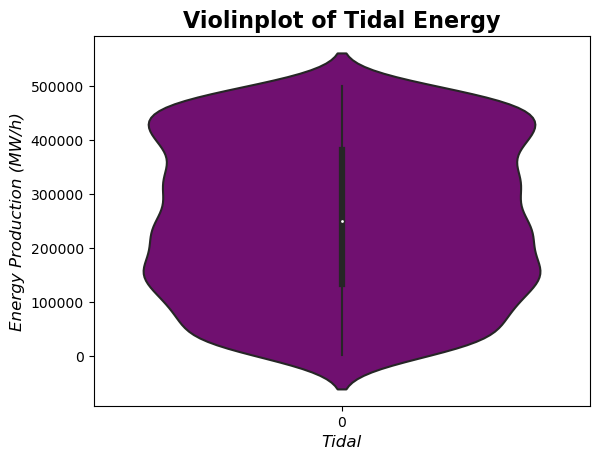

In [111]:
mask_et_6 = df['Type_of_Renewable_Energy'] == 6

et_6_df=df.loc[mask_et_6].reset_index(drop=True)

et_6_df.head()

# Create a Matplotlib figure and axis:

# Use the violinplot function to create each violin plot within the same figure:

sns.violinplot(data=et_6_df['Energy_Production_MWh'], color="Purple")
plt.xlabel("Tidal", fontstyle="italic", fontsize=12)
plt.ylabel("Energy Production (MW/h)", fontstyle="italic", fontsize=12)
plt.title("Violinplot of Tidal Energy", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Violinplot of Wave')

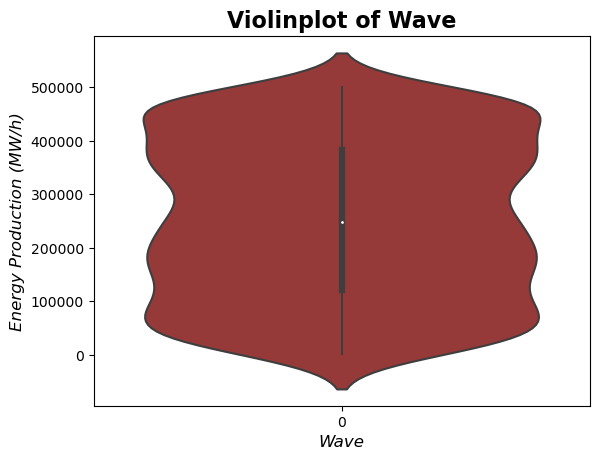

In [112]:
mask_et_7 = df['Type_of_Renewable_Energy'] == 7

et_7_df=df.loc[mask_et_7].reset_index(drop=True)

et_7_df.head()

# Create a Matplotlib figure and axis:

# Use the violinplot function to create each violin plot within the same figure:

sns.violinplot(data=et_7_df['Energy_Production_MWh'], color="Brown")
plt.xlabel("Wave", fontstyle="italic", fontsize=12)
plt.ylabel("Energy Production (MW/h)", fontstyle="italic", fontsize=12)
plt.title("Violinplot of Wave", fontsize=16, fontweight="bold")

In [113]:
# # Create a Matplotlib figure and axis:
# ax = plt.subplots()

# fig, ax = plt.subplots()
# # Use the violinplot function to create each violin plot within the same figure:

# sns.violinplot(data=et_1_df['Energy_Production_MWh'], color="Saffron")
# sns.violinplot(data=et_2_df['Energy_Production_MWh'], color="Saffron")
# sns.violinplot(data=et_3_df['Energy_Production_MWh'], color="Saffron")
# sns.violinplot(data=et_4_df['Energy_Production_MWh'], color="Saffron")
# sns.violinplot(data=et_5_df['Energy_Production_MWh'], color="Saffron")
# sns.violinplot(data=et_6_df['Energy_Production_MWh'], color="Saffron")
# sns.violinplot(data=et_7_df['Energy_Production_MWh'], color="Saffron")
# plt.show()

Text(0.5, 1.0, 'Violin Plot of Enegy Production based on Governmental Funding')

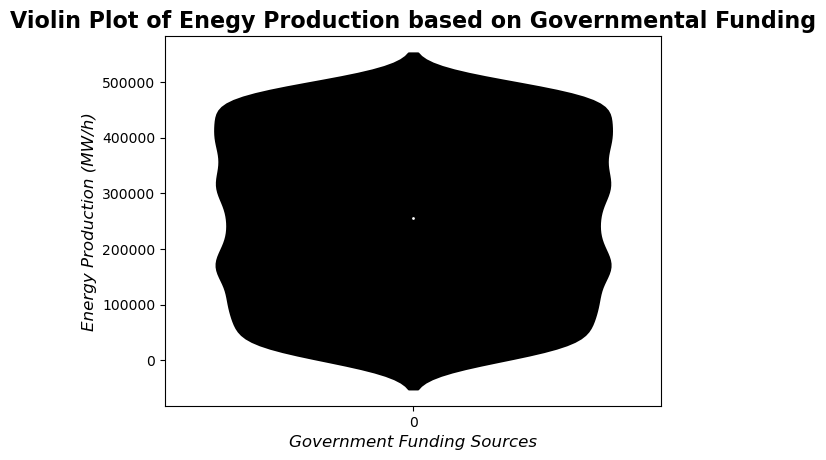

In [115]:
mask_gov = df['Funding_Sources'] == 1

df_gov=df.loc[mask_gov].reset_index(drop=True)

df_gov.head()

# Create a Matplotlib figure and axis:

# Use the violinplot function to create each violin plot within the same figure:

sns.violinplot(data=df_gov['Energy_Production_MWh'], color="Black")
plt.xlabel("Government Funding Sources", fontstyle="italic", fontsize=12)
plt.ylabel("Energy Production (MW/h)", fontstyle="italic", fontsize=12)
plt.title("Violin Plot of Enegy Production based on Governmental Funding", fontsize=16, fontweight="bold")

In [ ]:
mask_gov = df['Funding_Sources'] == 1

df_gov_finances=df.loc[mask_gov].reset_index(drop=True)

df_gov_finances.head()

# Create a Matplotlib figure and axis:

# Use the violinplot function to create each violin plot within the same figure:

sns.violinplot(data=df_gov_finances['Financial_Incentives_USD'], color="Dark Green")
plt.xlabel("Government Funding Sources", fontstyle="italic", fontsize=12)
plt.ylabel("Financial Incentives (MW/h)", fontstyle="italic", fontsize=12)
plt.title("Violin Plot of Enegy Production based on Governmental Funding", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Violin Plot of Enegy Production based on Governmental Funding')

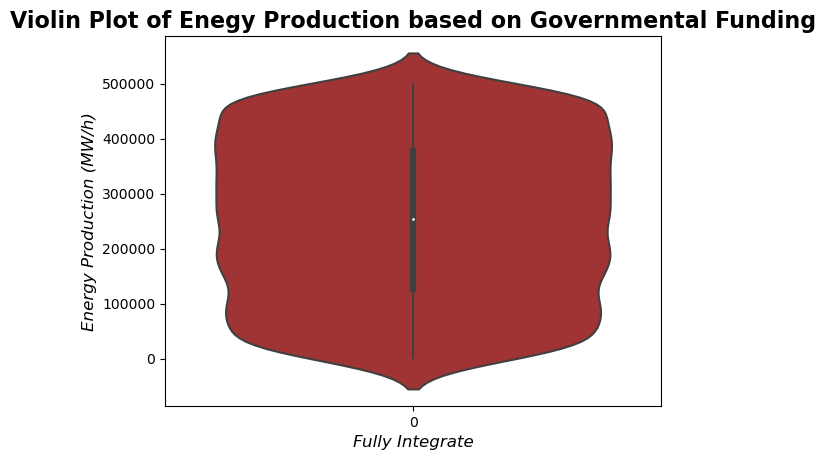

In [116]:
mask_grid = df['Grid_Integration_Level'] == 1

df_grid=df.loc[mask_grid].reset_index(drop=True)

df_grid.head()

# Create a Matplotlib figure and axis:

# Use the violinplot function to create each violin plot within the same figure:

sns.violinplot(data=df_grid['Energy_Production_MWh'], color="firebrick")
plt.xlabel("Fully Integrate", fontstyle="italic", fontsize=12)
plt.ylabel("Energy Production (MW/h)", fontstyle="italic", fontsize=12)
plt.title("Violin Plot of Enegy Production based on Governmental Funding", fontsize=16, fontweight="bold")

In [126]:
wind_full_df.head()

wind_full_df['Type_of_Renewable_Energy'].count()

562

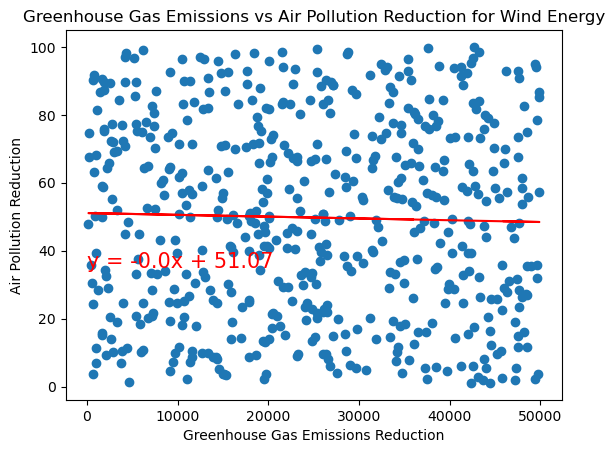

In [122]:
wind_full_mask = et_2_df.Grid_Integration_Level == 1
wind_full_df = et_2_df.loc[wind_full_mask].reset_index(drop=True)

x_values = wind_full_df['GHG_Emission_Reduction_tCO2e']
y_values = wind_full_df['Air_Pollution_Reduction_Index']
# sizes = question_1_df['Storage_Efficiency_Percentage']
# colors = over_98_question['Type_of_Renewable_Energy'].map({"1": 'Green', "2": 'Spanish orange', "3": 'Indigo Dye', "4": 'Carmine', "5": 'Dark spring green', "6": 'Lavender (floral)', "7": "Seal brown"})
plt.scatter(x_values,y_values)
# , s=sizes
plt.xlabel('Greenhouse Gas Emissions Reduction')
plt.ylabel('Air Pollution Reduction')
plt.title("Greenhouse Gas Emissions vs Air Pollution Reduction for Wind Energy")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,35),fontsize=15,color="red")
plt.show()

In [ ]:
et_2_df.head()

x_values = et_2_df['GHG_Emission_Reduction_tCO2e']
y_values = et_2_df['Air_Pollution_Reduction_Index']
# sizes = question_1_df['Storage_Efficiency_Percentage']
# colors = over_98_question['Type_of_Renewable_Energy'].map({"1": 'Green', "2": 'Spanish orange', "3": 'Indigo Dye', "4": 'Carmine', "5": 'Dark spring green', "6": 'Lavender (floral)', "7": "Seal brown"})
plt.scatter(x_values,y_values)
# , s=sizes
plt.xlabel('Greenhouse Gas Emissions Reduction')
plt.ylabel('Air Pollution Reduction')
plt.title("Greenhouse Gas Emissions vs Air Pollution Reduction for Wind Energy")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,35),fontsize=15,color="red")
plt.show()

ValueError: x and y must be the same size

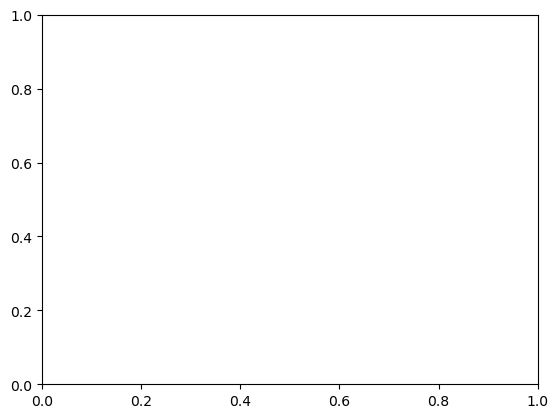

In [125]:
# et_2_df.head()

x_values = et_1_df['Initial_Investment_USD']
y_values = et_2_df['Initial_Investment_USD']
# sizes = question_1_df['Storage_Efficiency_Percentage']
# colors = over_98_question['Type_of_Renewable_Energy'].map({"1": 'Green', "2": 'Spanish orange', "3": 'Indigo Dye', "4": 'Carmine', "5": 'Dark spring green', "6": 'Lavender (floral)', "7": "Seal brown"})
plt.scatter(x_values,y_values)
# , s=sizes
plt.xlabel('Initial Investment for Solar Energy')
plt.ylabel('Initial Investment for Wind Energy')
plt.title("Initial Investment for Solar vs Wind Energy")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,35),fontsize=15,color="red")
plt.show()